# Ch3. 特征增强：清洗数据

在接下来的几章中，我们将：
- 识别数据中的缺失值；
- 删除有害数据；
- 输入（填充）缺失值；
- 对数据进行归一化/标准化；
- 构建新特征；手动或自动选择（移除）特征；
- 使用数学矩阵计算将数据集转换到不同的维度。

## 3.1 识别数据中的缺失值 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
pima = pd.read_csv('C:/pwork/Feature-Engineering-Made-Easy/data/pima.data')
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
pima_column_names = [
    'times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure',
    'triceps_thickness', 'serum_insulin', 'bmi', 
    'pedigree_function', 'age', 'onset_diabetes'
]
pima = pd.read_csv(
    'C:/pwork/Feature-Engineering-Made-Easy/data/pima.data',
    names=pima_column_names
)
# 空准确率，65%的人没有糖尿病
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

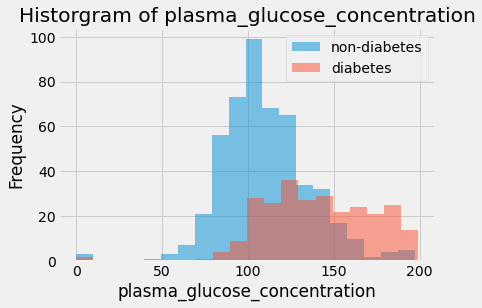

In [4]:
col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col], 20, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 20, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title(f'Historgram of {col}')
plt.show()

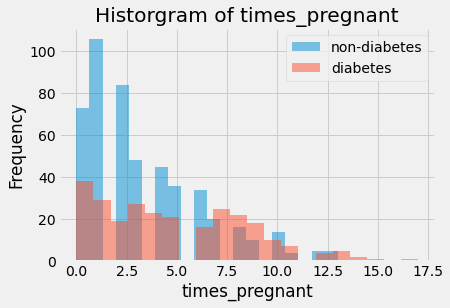

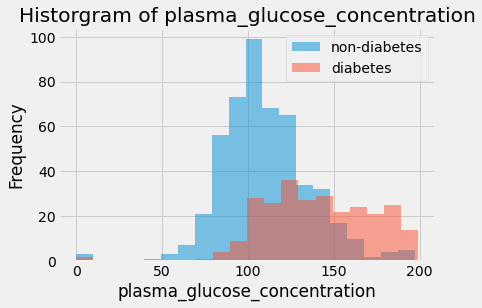

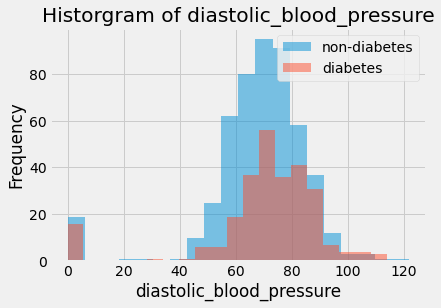

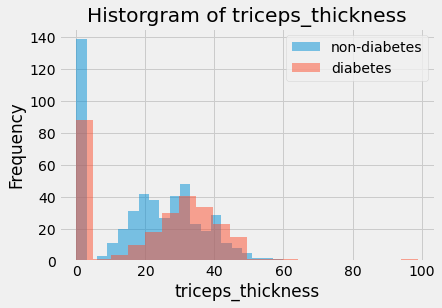

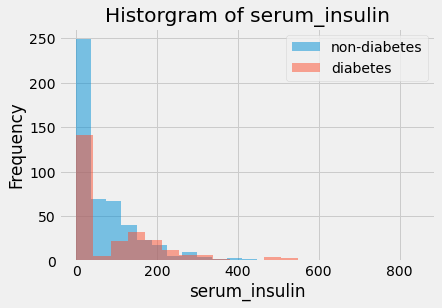

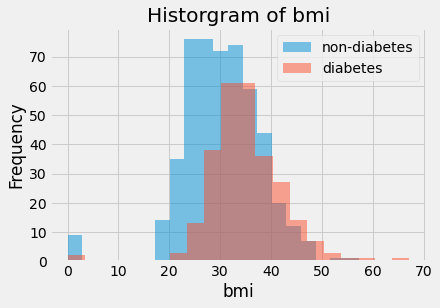

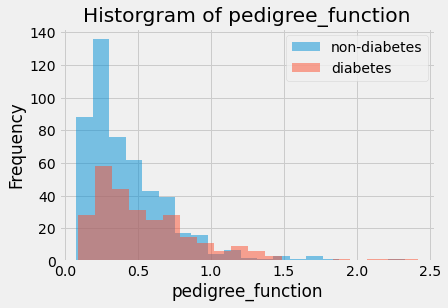

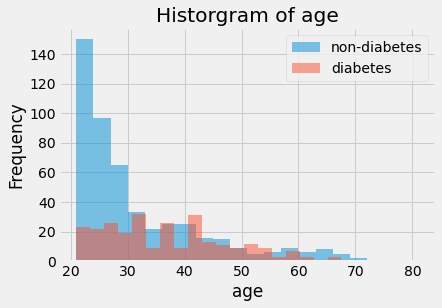

In [5]:
for col in pima_column_names[:-1]:
    plt.hist(pima[pima['onset_diabetes']==0][col], 20, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 20, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Historgram of {col}')
    plt.show()

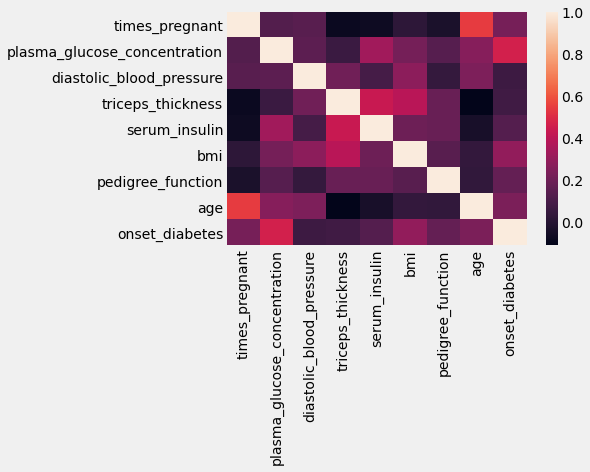

In [6]:
sns.heatmap(pima.corr())

In [7]:
pima.corr()['onset_diabetes']# 相关矩阵 
# plasma_glucose_concentration 很明显是重要的变量 

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

In [8]:
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [9]:
pima['serum_insulin'].isnull().sum()

0

In [10]:
pima.describe() # 基本的描述性统计 

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


数据中还是存在缺失值的！我们已经知道缺失的数据用0填充过了，真不走运。作为数据科学家，你必须时刻保持警惕，尽可能地了解数据集，以便找到使用其他符号填充的缺失数据。务必阅读公开数据集的所有文档，里面有可能提到了缺失数据的问题。

## 3.2 处理数据集中的缺失值 

In [11]:
# 被错误填充的缺失值是 0 
pima['serum_insulin'].isnull().sum()

0

In [12]:
pima['serum_insulin'] = pima['serum_insulin'].replace([0], [None])
# 用 None 手动替换 0

In [13]:
# 方式二：np.nan
# pima['serum_insulin_new'] = pima['serum_insulin'].replace(0, np.nan)
pima['serum_insulin'].isnull().sum()

374

In [14]:
# 直接对所有列操作，快一些 
columns = ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness'] 
 
for col in columns:
    pima[col].replace([0], [None], inplace=True) 

In [15]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [16]:
pima.head() 

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [17]:
pima.describe().round(3)

,times_pregnant,serum_insulin,pedigree_function,age,onset_diabetes
count,768.000,394.000,768.000,768.000,768.000
mean,3.845,155.548,0.472,33.241,0.349
std,3.370,118.776,0.331,11.760,0.477
min,0.000,14.000,0.078,21.000,0.000
25%,1.000,76.250,0.244,24.000,0.000
50%,3.000,125.000,0.372,29.000,0.000
75%,6.000,190.000,0.626,41.000,1.000
max,17.000,846.000,2.420,81.000,1.000


In [18]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.6867627785059, 30.53564107280403)

### 3.2.1 删除有害的行

In [19]:
pima_dropped = pima.dropna()

In [20]:
pima_dropped

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
6,3,78,50,32,88.0,31,0.248,26,1
8,2,197,70,45,543.0,30.5,0.158,53,1
13,1,189,60,23,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510.0,43.3,0.222,26,1
755,1,128,88,39,110.0,36.5,1.057,37,1
760,2,88,58,26,16.0,28.4,0.766,22,0
763,10,101,76,48,180.0,32.9,0.171,63,0


In [21]:
num_rows_lost = round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))
print("retained {}% of rows".format(num_rows_lost))

retained 49% of rows


In [22]:
# 丢弃缺失值前后的探索性数据分析 
pima_dropped['onset_diabetes'].value_counts(normalize=True)
# 前后的 True 和 False 比例差不多 

0    0.668367
1    0.331633
Name: onset_diabetes, dtype: float64

In [23]:
# 每列的均值（不算缺失值） 
pima.mean() 

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [24]:
# 每列的均值（删除缺失值） 
pima_dropped.mean() 

times_pregnant                    3.301020
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insulin                   156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: float64

In [25]:
# 均值变化百分比 
(pima_dropped.mean()- pima.mean())/pima.mean()

times_pregnant                 -0.141489
plasma_glucose_concentration    0.007731
diastolic_blood_pressure       -0.024058
triceps_thickness              -0.000275
serum_insulin                   0.003265
bmi                             0.019372
pedigree_function               0.108439
age                            -0.071481
onset_diabetes                 -0.049650
dtype: float64

Text(0, 0.5, '% change')

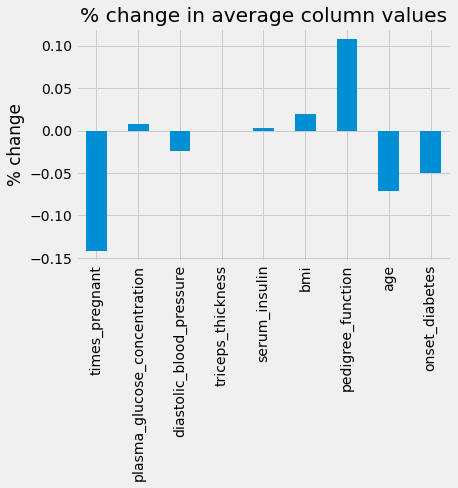

In [26]:
# 均值变化百分比条形图 
ax = ((pima_dropped.mean()- pima.mean())/pima.mean()).plot(kind='bar',
                                                           title='% change in average column values')
ax.set_ylabel('% change')

In [27]:
# 开始机器学习 

# 注意使用删除缺失值后的数据 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
# 删除响应变量，建立特征矩阵 
print("learning from {} rows".format(X_dropped.shape[0])) 
y_dropped = pima_dropped['onset_diabetes']

learning from 392 rows


In [28]:
# 网格搜索所需的变量和实例 
 
# 需要试验的 KNN 模型参数 
knn_params = {
    'n_neighbors': [i for i in range(1, 25)]
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)
print(grid.best_score_, grid.best_params_)
# 但是我们只学习了很少的行 

0.7630314832846479 {'n_neighbors': 20}


In [29]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [30]:
pima[pima['plasma_glucose_concentration'].isnull()].index

Int64Index([75, 182, 342, 349, 502], dtype='int64')

In [31]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

In [32]:
pima['plasma_glucose_concentration'].fillna(
pima['plasma_glucose_concentration'].mean(), inplace=True)

### 3.2.2 填充缺失值

In [33]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [34]:
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [35]:
# pima.drop('serum_insulin_new', axis=1, inplace=True)

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [37]:
pima_imputed = imputer.fit_transform(pima)

In [38]:
pima_column_names

['times_pregnant',
 'plasma_glucose_concentration',
 'diastolic_blood_pressure',
 'triceps_thickness',
 'serum_insulin',
 'bmi',
 'pedigree_function',
 'age',
 'onset_diabetes']

In [39]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)

In [40]:
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [41]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [42]:
pima_zero = pima.fillna(0)
X_zero = pima_zero.drop('onset_diabetes', axis=1)
y_zero = pima_zero['onset_diabetes']

knn_params = {
    'n_neighbors': [i for i in range(1, 8)]
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)
print(grid.best_score_, grid.best_params_)

0.7409387997623291 {'n_neighbors': 7}


### 3.2.3 在机器学习流水线中填充值

In [44]:
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
X.isnull().sum()

serum_insulin    374
dtype: int64

In [46]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

print(training_mean)

serum_insulin    158.546053
dtype: float64


In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.4895833333333333


In [48]:
from sklearn.pipeline import Pipeline

knn_params = {
    'classify__n_neighbors':[i for i in range(1, 30)]
}
knn = KNeighborsClassifier()
mean_impute = Pipeline([('impute', SimpleImputer(strategy='mean')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)
print(f'best score:{grid.best_score_}\n\
params:{grid.best_params_}')

best score:0.7539512774806892
params:{'classify__n_neighbors': 29}


In [49]:
from sklearn.pipeline import Pipeline

knn_params = {
    'classify__n_neighbors':[i for i in range(1, 30)]
}
knn = KNeighborsClassifier()
mean_impute = Pipeline([('impute', SimpleImputer(strategy='median')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)
print(f'best score:{grid.best_score_}\n\
params:{grid.best_params_}')

best score:0.7553263729734317
params:{'classify__n_neighbors': 14}


## 3.3 标准化和归一化 

In [50]:
impute = SimpleImputer(strategy='mean')
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima),
                                columns=pima_column_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13444FA0>,
      dtype=object)

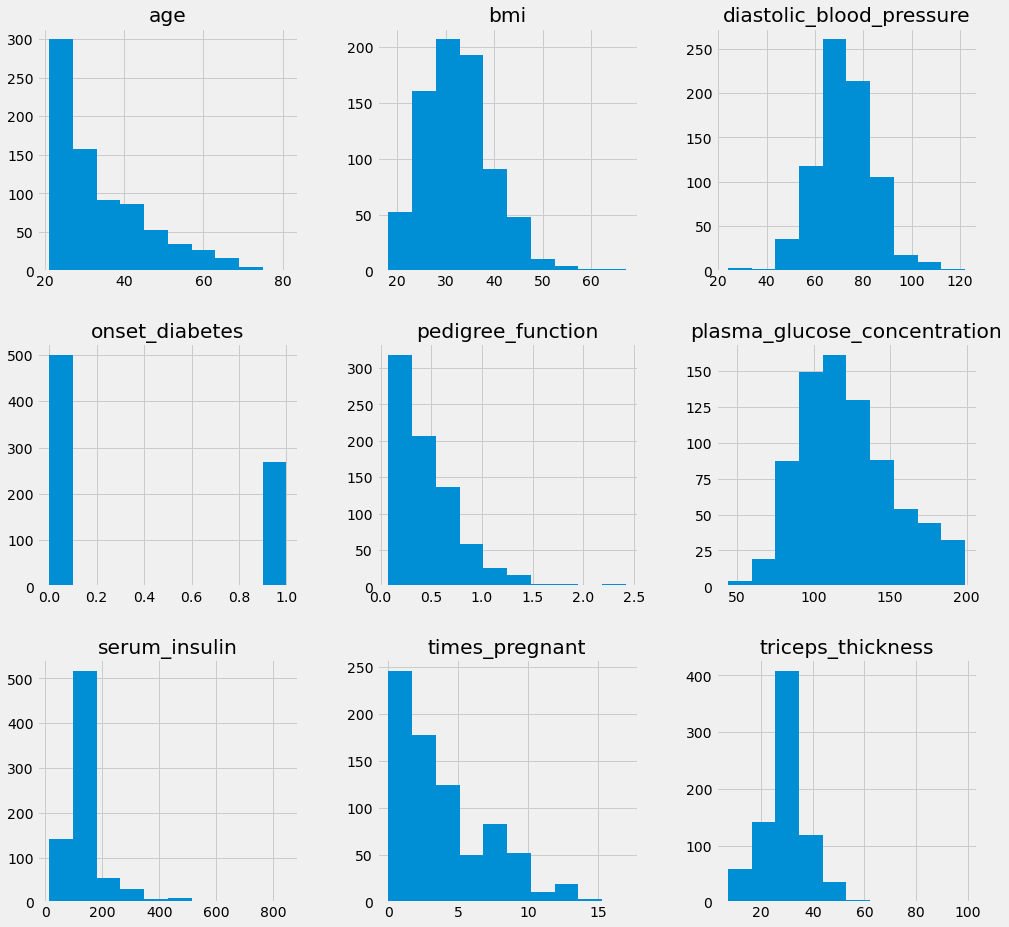

In [51]:
pima_imputed_mean.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x010CDBF8>,
      dtype=object)

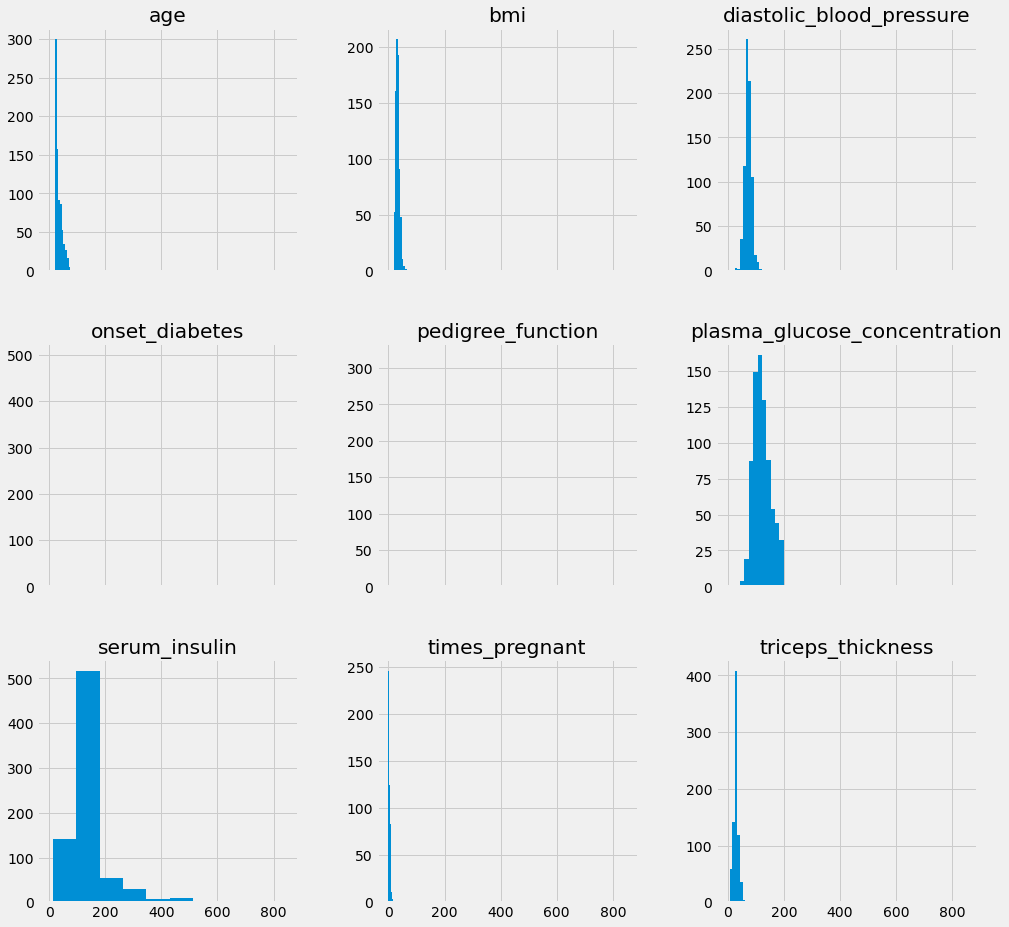

In [52]:
pima_imputed_mean.hist(figsize=(15,15), sharex=True)

### 3.3.1 z分数标准化 

In [53]:
print(pima['plasma_glucose_concentration'].head()) 

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: plasma_glucose_concentration, dtype: float64


mean:121.68676277850591
std:30.435948867207657


Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration')

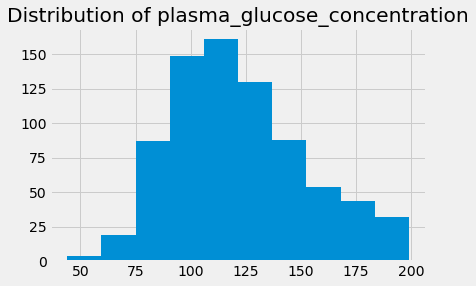

In [54]:
from sklearn.preprocessing import StandardScaler

print(f"mean:{pima['plasma_glucose_concentration'].mean()}")
print(f"std:{pima['plasma_glucose_concentration'].std()}")
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

mean:-3.561965537339044e-16
std:1.0


Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Z Score Scaling')

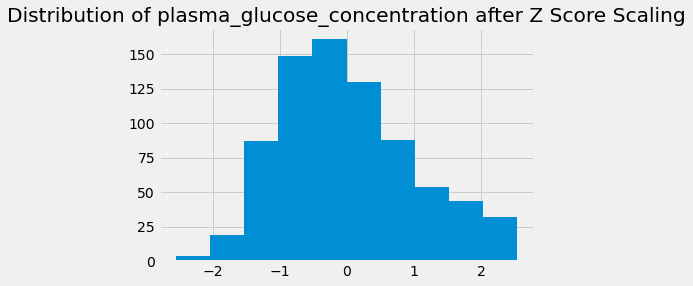

In [55]:
scaler = StandardScaler()
glucose_z_score_standardized = scaler.fit_transform(pima[['plasma_glucose_concentration']])
# 注意我们用双方括号，因为转换需要一个 DataFrame
# 均值是 0（浮点数误差），标准差是 1 
print(f'mean:{glucose_z_score_standardized.mean()}')
print(f'std:{glucose_z_score_standardized.std()}')
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x144F77F0>,
      dtype=object)

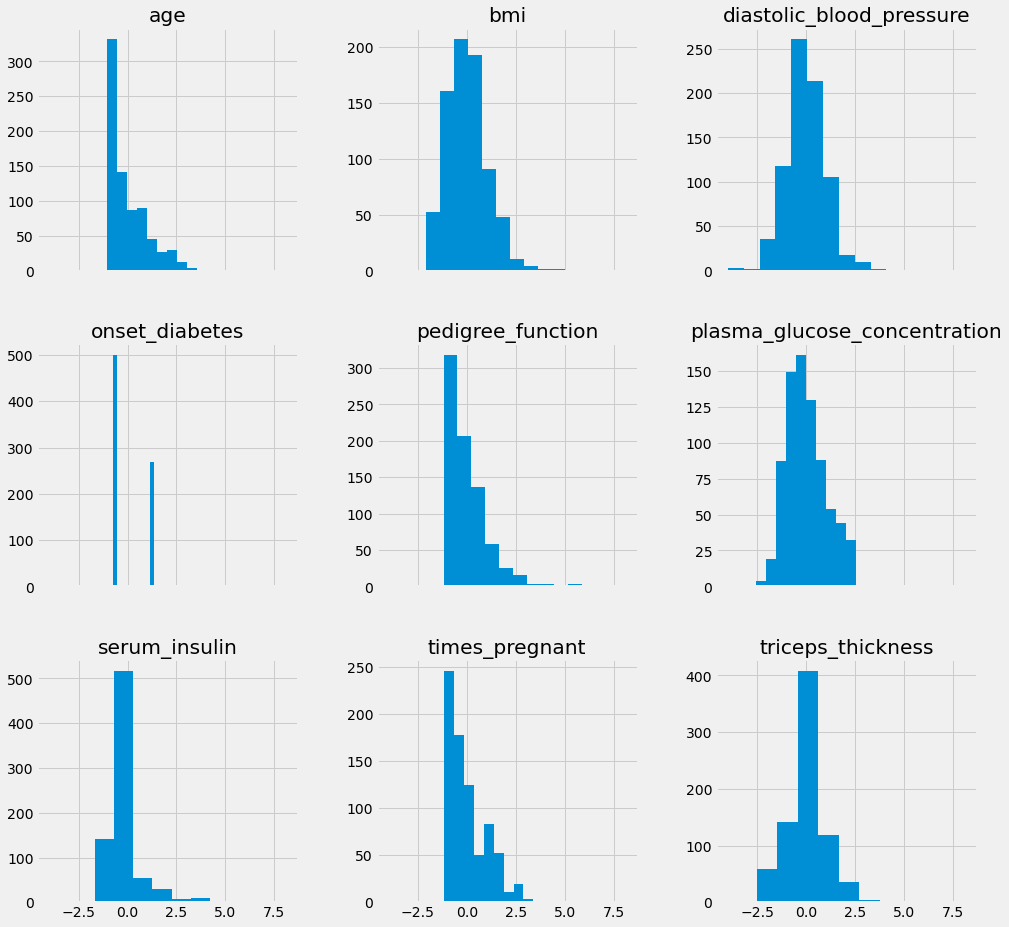

In [56]:
scale = StandardScaler()
pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean),
                                       columns=pima_column_names)
pima_imputed_mean_scaled.hist(figsize=(15,15), sharex=True)
# 空间相同了 

In [57]:
knn_params = {
    'impute__strategy': ['mean', 'median'],
    'classify__n_neighbors': [i for i in range(1, 8)]
}
knn = KNeighborsClassifier()
mean_impute_standardize = Pipeline(
[('impute', SimpleImputer()), ('standardize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1) 
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(f'best score:{grid.best_score_}\n\
params:{grid.best_params_}')

best score:0.7539173245055598
params:{'classify__n_neighbors': 7, 'impute__strategy': 'mean'}


### 3.3.2 min-max标准化 

In [58]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima_column_names)
pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
from sklearn.preprocessing import MinMaxScaler

knn_params = {
    'impute__strategy': ['mean', 'median'],
    'classify__n_neighbors': [i for i in range(1, 10)]
}
knn = KNeighborsClassifier()
mean_impute_standardize = Pipeline(
[('impute', SimpleImputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1) 
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(f'best score:{grid.best_score_}\n\
params:{grid.best_params_}')

best score:0.7630336983278159
params:{'classify__n_neighbors': 7, 'impute__strategy': 'median'}


### 3.3.3 行归一化 

In [60]:
np.sqrt((pima_imputed**2).sum(axis=1)).mean()

223.36222025823744

In [61]:
from sklearn.preprocessing import Normalizer

normalize = Normalizer()
pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed),
                              columns=pima_column_names)
np.sqrt((pima_normalized**2).sum(axis=1))

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
763    1.0
764    1.0
765    1.0
766    1.0
767    1.0
Length: 768, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135794D8>,
      dtype=object)

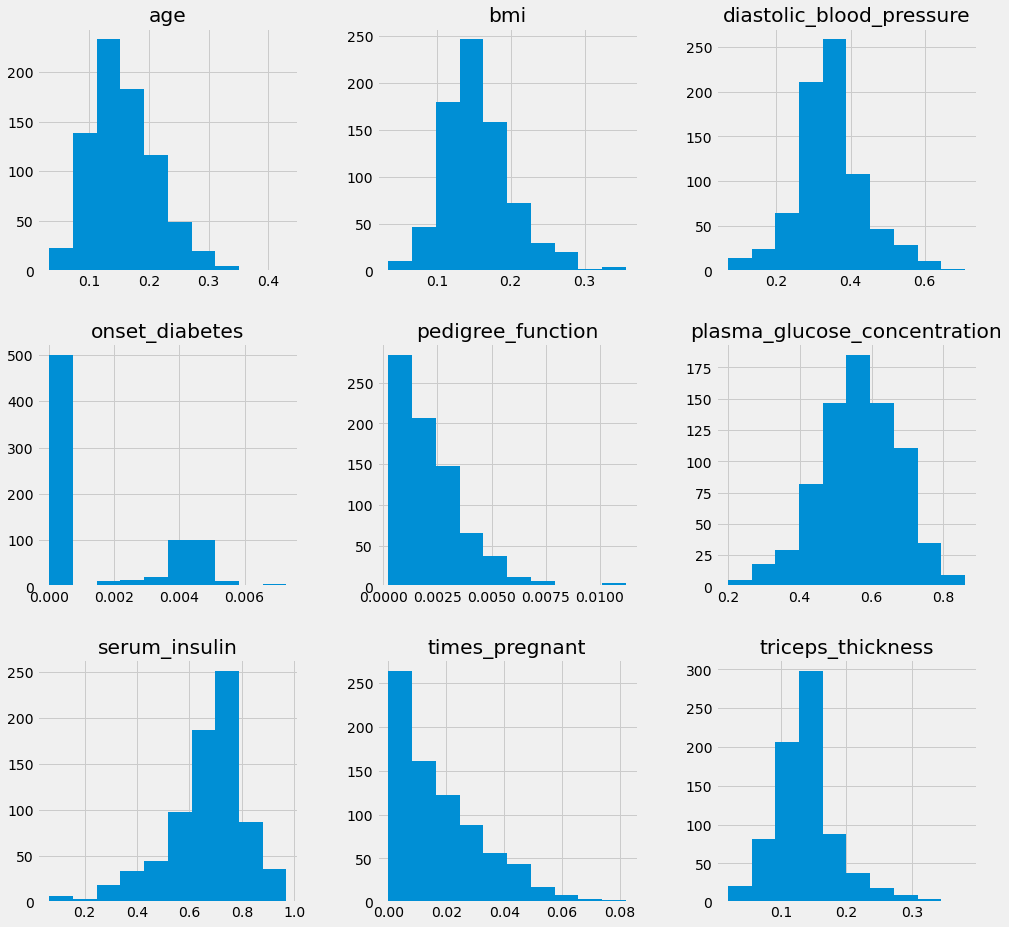

In [62]:
pima_normalized.hist(figsize=(15,15))

In [63]:
from sklearn.preprocessing import MinMaxScaler

knn_params = {
    'impute__strategy': ['mean', 'median'],
    'classify__n_neighbors': [i for i in range(1, 8)]
}
knn = KNeighborsClassifier()
mean_impute_standardize = Pipeline(
[('impute', SimpleImputer()), ('standardize', Normalizer()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1) 
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(f'best score:{grid.best_score_}\n\
params:{grid.best_params_}')

best score:0.7006111535523301
params:{'classify__n_neighbors': 7, 'impute__strategy': 'median'}
